### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [101]:
data = pd.read_csv('data/coupons.csv')

In [102]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [104]:
data.shape


(12684, 26)

4. What proportion of the total observations chose to accept the coupon? 



In [105]:
data.isnull().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [106]:
data["car"].value_counts()


car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [107]:
data[data["Bar"].isnull()].head(20)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
522,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
852,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,2h,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
853,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),1d,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
854,No Urgent Place,Partner,Sunny,80,10AM,Bar,2h,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
855,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,2h,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1


In [108]:
data[data["Bar"].isnull() | data["CoffeeHouse"].isnull() | data["CarryAway"].isnull() | data["RestaurantLessThan20"].isnull() | data["Restaurant20To50"].isnull()].shape[0]
data.shape[0]


12684

In [109]:
data_clean = data[data["Bar"].notnull() & data["CoffeeHouse"].notnull() & 
                  data["CarryAway"].notnull() & data["RestaurantLessThan20"].notnull() & 
                  data["Restaurant20To50"].notnull()]

data_cars_subset = data_clean[data_clean["car"].notnull()]

data_clean = data_clean.drop("car", axis = 1)

<Axes: title={'center': 'Total Coupons Issued- by type'}, xlabel='Coupon Type', ylabel='Coupon Count'>

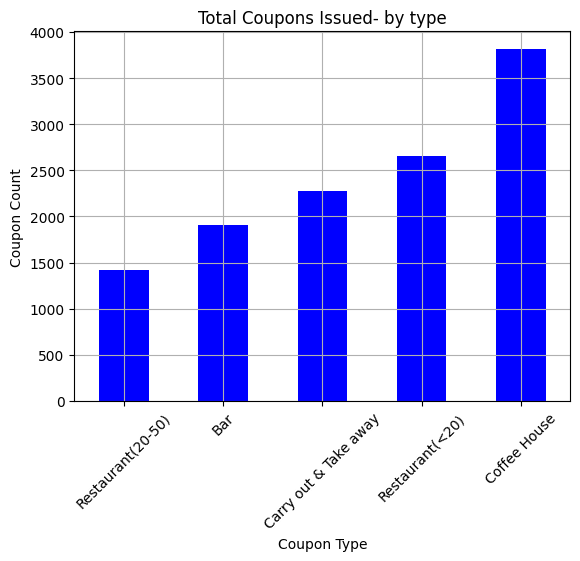

In [110]:
data = data_clean
data['coupon'].value_counts(ascending=True).plot(kind = 'bar', title="Total Coupons Issued- by type", grid=True, 
                                    ylabel="Coupon Count", xlabel="Coupon Type", color="Blue", rot=45)

In [114]:
val = data['Y'].mean() * 100
print("Percentage of total coupons accepted with are {:.1f}%".format(val))

Percentage of total coupons accepted with are 56.9%


5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(20-50)'),
  Text(1, 0, 'Bar'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Restaurant(<20)'),
  Text(4, 0, 'Coffee House')])

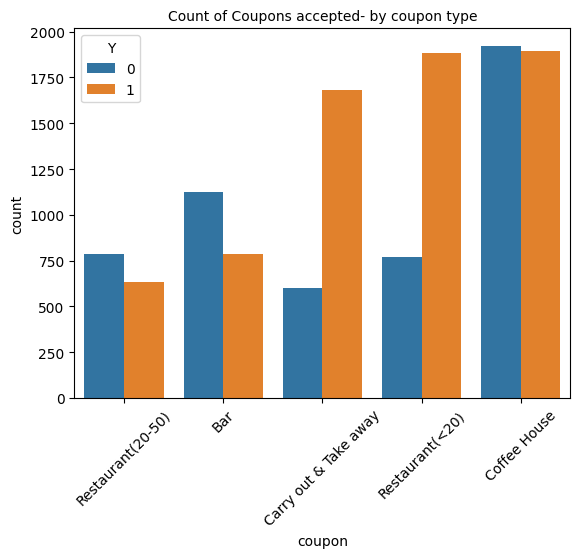

In [115]:
#distribution of total coupon accepted per coupon type
sns.countplot(data = data, x = "coupon", hue = 'Y', order=data['coupon'].value_counts(ascending=True).index)
plt.title('Count of Coupons accepted- by coupon type', size = 10)
plt.xticks(rotation=45)


In [116]:
for coupon_type in ['Restaurant(<20)','Coffee House','Carry out & Take away','Bar','Restaurant(20-50)']:
   grp1 = data[data['coupon'].isin([coupon_type])]
   val= ((grp1['Y'].value_counts()[1])/len(grp1.index))*100
   print("Percentage of coupons accepted with coupon type-",coupon_type,val) 

Percentage of coupons accepted with coupon type- Restaurant(<20) 70.9008669430833
Percentage of coupons accepted with coupon type- Coffee House 49.63312368972746
Percentage of coupons accepted with coupon type- Carry out & Take away 73.7719298245614
Percentage of coupons accepted with coupon type- Bar 41.19184526921067
Percentage of coupons accepted with coupon type- Restaurant(20-50) 44.60127028934369


6. Use a histogram to visualize the temperature column.

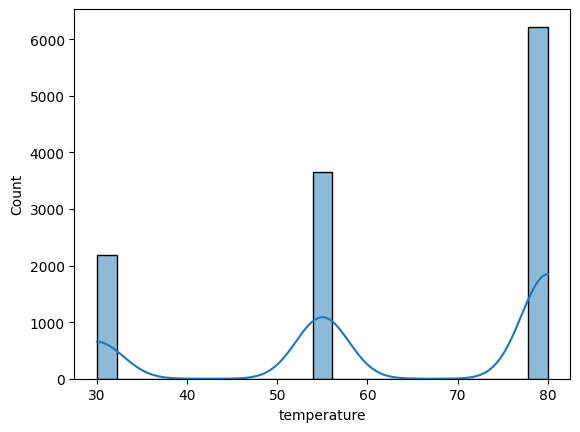

In [117]:
sns.histplot(data, x = 'temperature', kde=True)
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [45]:
df_bar = data.query('coupon == "Bar"')
df_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [ ]:
sns.histplot(data=df_bar, x='Bar', kde=True).set(title=' Compare  acceptance rate between Bar visitor',xlabel='Number of visits', ylabel=' Count')

plt.show()

2. What proportion of bar coupons were accepted?


In [118]:
bar_coupons_accepted = df_bar['Y'].mean() * 100
print("Proportion of bar coupons were accepted bar_coupons_accepted are {:.1f}%".format(val))

proportion of bar coupons were accepted bar_coupons_accepted are 44.6%


Y
1    6019
0    4679
Name: count, dtype: int64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [121]:
#create dataframe for 3 or fewer bar visits
dfbar_3few = data[data['Bar'].isin(['never','less1','1~3'])]
#calculate the percent of redeemed

val = dfbar_3few['Y'].value_counts()[1]/len(dfbar_3few.index)*100
print("Total  Bar visitors with 3 or less month visit accepting coupons is {:.1f}%".format(val))

dfbar_3more = data[~data['Bar'].isin(['never','less1','1~3'])]
val = dfbar_3more['Y'].value_counts()[1]/len(dfbar_3more.index)*100

print("Total  Bar visitors more than 3 months visit accepting coupons: {:.1f}%".format(val))


Total  Bar visitors with 3 or less month visit accepting coupons is 56.3%
Total  Bar visitors more than 3 months visit accepting coupons: 62.1%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [123]:
bar_more1 = ["1~3", "4~8", "gt8"]
age_less25 = ['21', 'below21']

df = data[data['Bar'].isin(bar_more1) & ~data['age'].isin(age_less25)]
val = df['Y'].value_counts()[1]/len(df.index)*100
print("Total visitor with age more than 25 and Bar visitors  more than 1 month accepting coupons is {:.1f}%".format(val))

df4 = data[data['Bar'].isin(bar_more1) & data['age'].isin(age_less25)]
val = df4['Y'].value_counts()[1]/len(df4.index)*100
print("Total vistor with age less than 25 and Bar visitors  more than 1 month accepting coupons is {:.1f}%".format(val))

df5 = data[~data['Bar'].isin(bar_more1) & ~data['age'].isin(age_less25)]
val = df['Y'].value_counts()[1]/len(df.index)*100
print("Total vistor with age more than 25 and Bar visitors  less 1 month accepting coupons is {:.1f}%".format(val))

df6 = data[~data['Bar'].isin(bar_more1) & data['age'].isin(age_less25)]
val = df6['Y'].value_counts()[1]/len(df6.index)*100
print("Total vistor with less than 25 and Bar visitors less 1 month accepting coupons is {:.1f}%".format(val))


Total visitor with age more than 25 and Bar visitors  more than 1 month accepting coupons is 62.3%
Total vistor with age less than 25 and Bar visitors  more than 1 month accepting coupons is 62.5%
Total vistor with age more than 25 and Bar visitors  less 1 month accepting coupons is 62.3%
Total vistor with less than 25 and Bar visitors less 1 month accepting coupons is 58.7%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [76]:
bar_more1 = ["1~3", "4~8", "gt8"]
occ = ["farming", "fishing", "forestry"]
passan = ["Kid(s)"]
df2 = df_bar[df_bar['Bar'].isin(bar_more1) & ~df_bar['passanger'].isin(passan) & ~df_bar['occupation'].isin(occ)]
val = df2['Y'].value_counts()[1]/len(df2.index)*100
print("Total acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry  {:.1f}%".format(val))


Total acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry  70.9%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [73]:
bar_more1 = ["1~3", "4~8", "gt8"]
occ = ["farming", "fishing", "forestry"]
passan = ["Kid(s)","widowed"]
age_less30 = ['21', 'below21', '26']

cheap_rest = ["4~8", "gt8"]
income_more50 = ['$50000 - $62499', '$75000 - $87499', '$87500 - $99999', '$62500 - $74999']


df3 = df_bar[(df_bar['Bar'].isin(bar_more1) & ~df_bar['passanger'].isin(passan)) |\
                                   (df_bar['Bar'].isin(bar_more1) & df_bar['age'].isin(age_less30)) |\
                                   (df_bar['RestaurantLessThan20'].isin(cheap_rest) & ~df_bar['income'].isin(income_more50))]
val = df3['Y'].value_counts()[1]/len(df3.index)*100
print("Total observations {:.1f}%".format(val))


Total observations 55.3%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [89]:
#Drivers accepted the Bar copon approx 41.2%. Highest being Restaurant(<20) (71%) and Carry out & Take away (73%)
#Coupon = Bar type in details
#Drivers accepted the Bar copon approx 41.2%. Highest being Restaurant(<20) (71%) and Carry out & Take away (73%)
#Total  Bar visitors with 3 or less month visit accepting coupons is 56.3%
#Total  Bar visitors more than 3 months visit accepting coupons: 62.1%
#Total visitor with age more than 25 and Bar visitors  more than 1 month accepting coupons is 62.3%
#Total vistor with age less than 25 and Bar visitors  more than 1 month accepting coupons is 62.5%
#Total vistor with age more than 25 and Bar visitors  less 1 month accepting coupons is 62.3%
#Total vistor with less than 25 and Bar visitors less 1 month accepting coupons is 58.7%
#Total acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry  70.9%



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Text(0.5, 1.0, 'Coupon acceptance by gender')

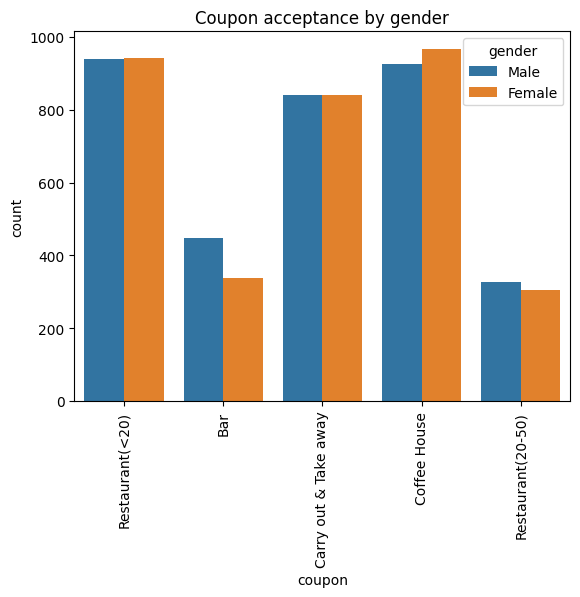

In [90]:
#acceptance by gender-
df_accept = data[data['Y']==1]
df_accept
sns.countplot(df_accept, x='coupon', hue='gender')
plt.xticks(rotation = 90)
plt.title('Coupon acceptance by gender')

In [91]:
#NOTE- Male accepts more Bar coupon while rest are equally accepted.

In [92]:
#creating groupby dataframe using sum function
accepted_by_education_norm = data['education'].value_counts(normalize=True) * 100
accepted_by_education_norm

education
Some college - no degree                  34.928388
Bachelors degree                          33.289180
Graduate degree (Masters or Doctorate)    14.968127
Associates degree                          8.825234
High School Graduate                       7.260535
Some High School                           0.728537
Name: proportion, dtype: float64

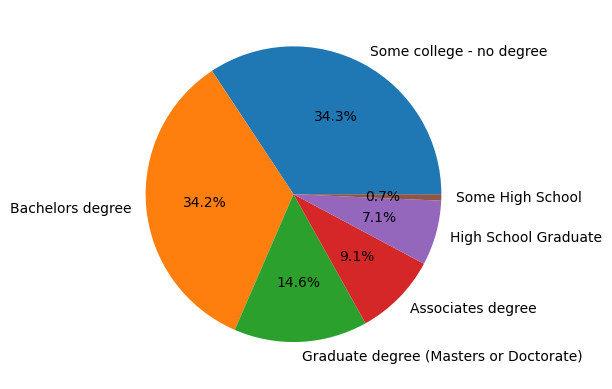

<Figure size 800x800 with 0 Axes>

In [93]:
data_edu_pie = {'education': ['Some college - no degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)', 'Associates degree','High School Graduate','Some High School'],
        'edu_attain': [34.3, 34.2, 14.6, 9.1, 7.1, 0.7]}
data_edu_pie1 = pd.DataFrame(data_edu_pie)
#pie chart visualization of educational attainment of the complete population
plt.pie(data_edu_pie1['edu_attain'], labels=data_edu_pie1['education'], autopct='%1.1f%%')
plt.figure(figsize=(8,8))
plt.show()

Text(0.5, 1.0, 'Coupon Utilization by Education Attainment')

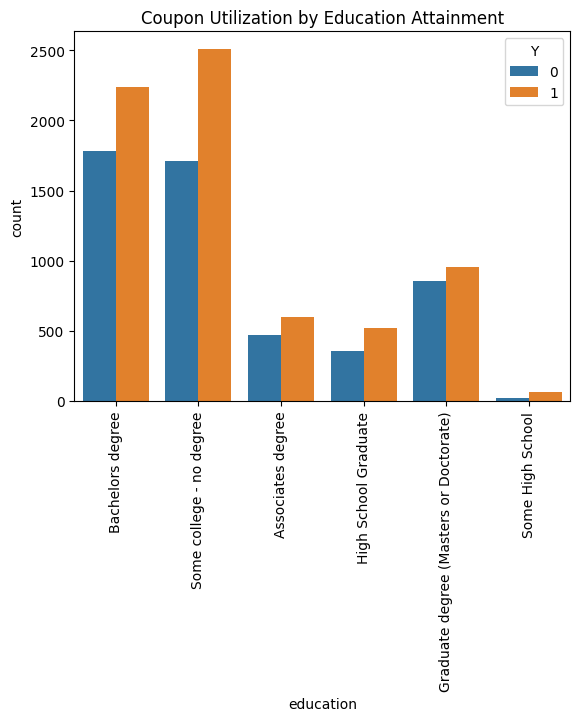

In [94]:
#histogram visualizing coupon utilization (redeemed or not) by educational attainment
sns.countplot(data, x='education', hue='Y',)
plt.xticks(rotation = 90)
plt.title('Coupon Utilization by Education Attainment')

In [95]:
#create dataframe for Some college - no degree
for degree in ['Some college - no degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)', 'Associates degree','High School Graduate','Some High School']:
   grp1 = data[data['education'].isin([degree])]
   val= ((grp1['Y'].value_counts()[1])/len(grp1.index))*100
   print("Percentage of coupons accepted with education-",degree,val) 

Percentage of coupons accepted with education- Some college - no degree 59.445366200521455
Percentage of coupons accepted with education- Bachelors degree 55.63292713255409
Percentage of coupons accepted with education- Graduate degree (Masters or Doctorate) 52.654867256637175
Percentage of coupons accepted with education- Associates degree 55.909943714821765
Percentage of coupons accepted with education- High School Graduate 59.40706955530216
Percentage of coupons accepted with education- Some High School 71.5909090909091


In [96]:
#Note- even tough 'Some High School' has higher percentage of acceptance but 'Some High School' contributed less to the total population (0.7%)

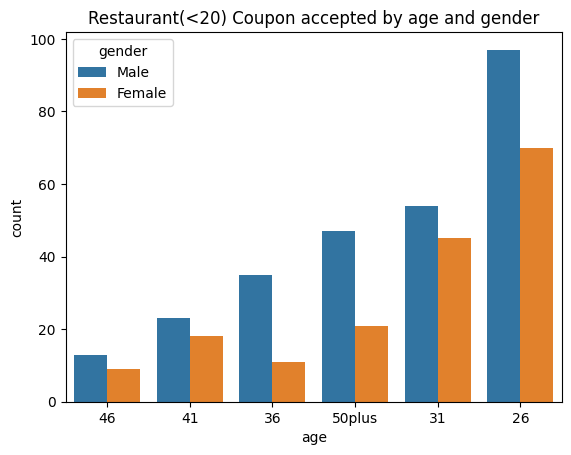

In [124]:
#fig.suptitle('Comparing those that accepted Coffee House coupon vs those that did not', size = 25)

df_res = df.query('coupon == "Restaurant(<20)" & Y == 1')
sns.countplot(data = df_res, x = "age", hue = 'gender', order=df_res['age'].value_counts(ascending=True).index)
plt.title('Restaurant(<20) Coupon accepted by age and gender')
plt.show()

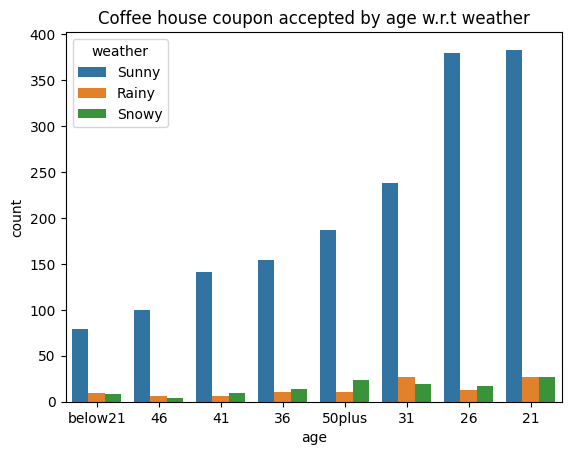

In [99]:
#sns.barplot(data = data.query('coupon == "Coffee House"'), x = 'weather', y = 'Y')
df_coff = data.query('coupon == "Coffee House" & Y == 1')
sns.countplot(data = df_coff, x = "age", hue = 'weather', order=df_coff['age'].value_counts(ascending=True).index)

plt.title('Coffee house coupon accepted by age w.r.t weather')

plt.show()


In [ ]:
#From plot- Coffee house coupon accepted by age w.r.t weather we see Coffee House coupon is accepted more when weather is Sunny


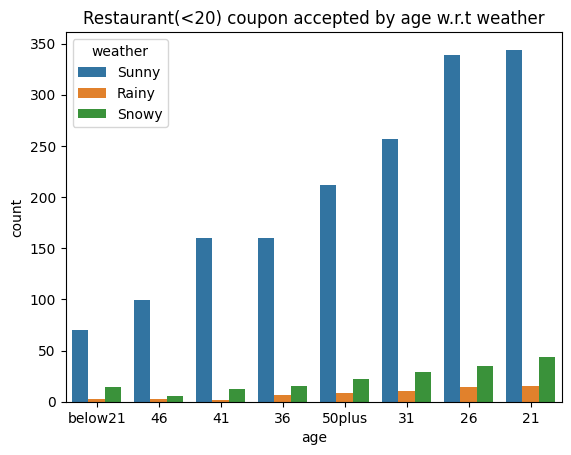

In [126]:
#sns.barplot(data = data.query('coupon == "Coffee House"'), x = 'weather', y = 'Y')
df_res_w = data.query('coupon == "Restaurant(<20)" & Y == 1')
sns.countplot(data = df_res_w, x = "age", hue = 'weather', order=df_coff['age'].value_counts(ascending=True).index)

plt.title('Restaurant(<20) coupon accepted by age w.r.t weather')

plt.show()


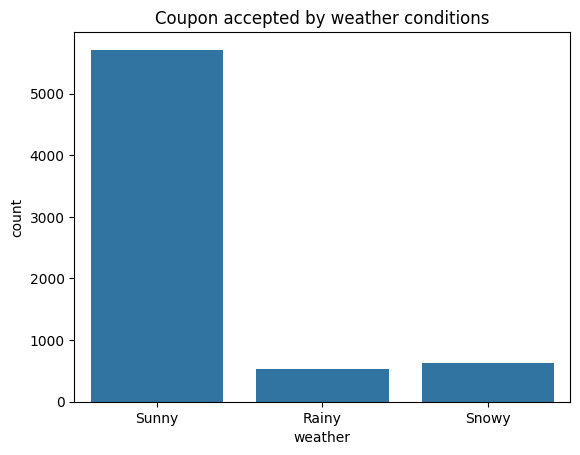

In [128]:
#sns.barplot(data = data.query('coupon == "Coffee House"'), x = 'weather', y = 'Y')
df = data.query(' Y == 1')
sns.countplot(data = df, x = "weather")

plt.title('Coupon accepted by weather conditions')

plt.show()

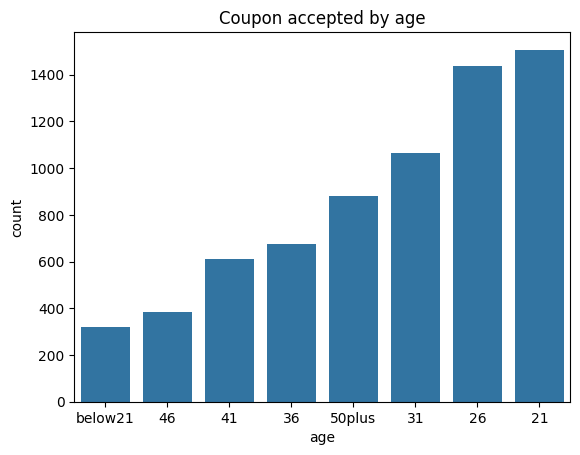

In [134]:
df = data.query('Y == 1')
sns.countplot(data = df, x = "age",order=df['age'].value_counts(ascending=True).index)

plt.title('Coupon accepted by age')

plt.show()

In [139]:
age = ['21','below21']

df = data.query(' Y == 1')

df2 = data[data['age'].isin(age)]
val = df2['Y'].value_counts()[1]/len(df2.index)*100
print("Percentage of coupons accepted with age less than 25- {:.1f}%".format(val))

Percentage of coupons accepted with age less than 25- 60.0%


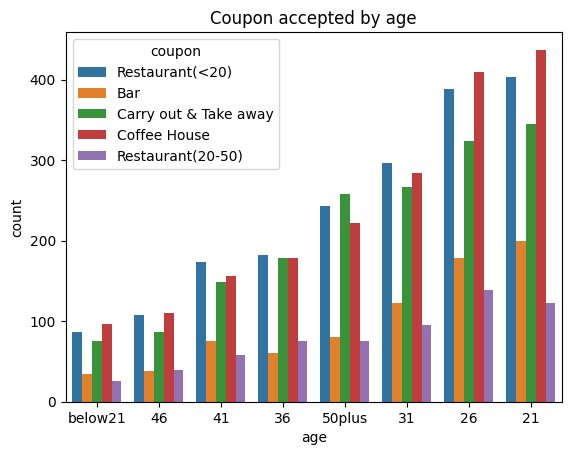

In [142]:
df_res = df.query('Y == 1')
sns.countplot(data = df_res, x = "age", hue = 'coupon', order=df_res['age'].value_counts(ascending=True).index)
plt.title('Coupon accepted by age')
plt.show()